In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KarthikeyanBaskaran/Marketing-Analytics/refs/heads/main/Churn%20Data/E-Commerce%20Churn%20Data.csv')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [4]:
df.shape

(5630, 20)

In [5]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [6]:
# To see the percentage of null

264/df.shape[0]

0.04689165186500888

In [7]:
# Looking at the values per column

for i in range(df.shape[1]):
  print(df.iloc[:,i].value_counts())

CustomerID
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: count, Length: 5630, dtype: int64
Churn
0    4682
1     948
Name: count, dtype: int64
Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: count, dtype: int64
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64
WarehouseToHome
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.

In [8]:
df_cleaned = df.copy()

In [9]:
#Take tenure 0 and Blanks and np.Nan

df_cleaned['Tenure'] = df_cleaned['Tenure'].replace([''], np.nan)

In [10]:
#Replacing the words CC with Credit card in the PreferredPaymentMode column
#Replacing the words COD with Cash on Delivery in the PreferredPaymentMode column
#Replacing the words E wallet with UPI in the PreferredPaymentMode column

df_cleaned['PreferredPaymentMode']=df_cleaned['PreferredPaymentMode'].replace('CC','Credit Card' )
df_cleaned['PreferredPaymentMode']=df_cleaned['PreferredPaymentMode'].replace('COD','Cash on Delivery' )


df_cleaned['PreferredLoginDevice']=df_cleaned['PreferredLoginDevice'].replace('Phone','Mobile Phone' )

In [11]:
df_cleaned.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

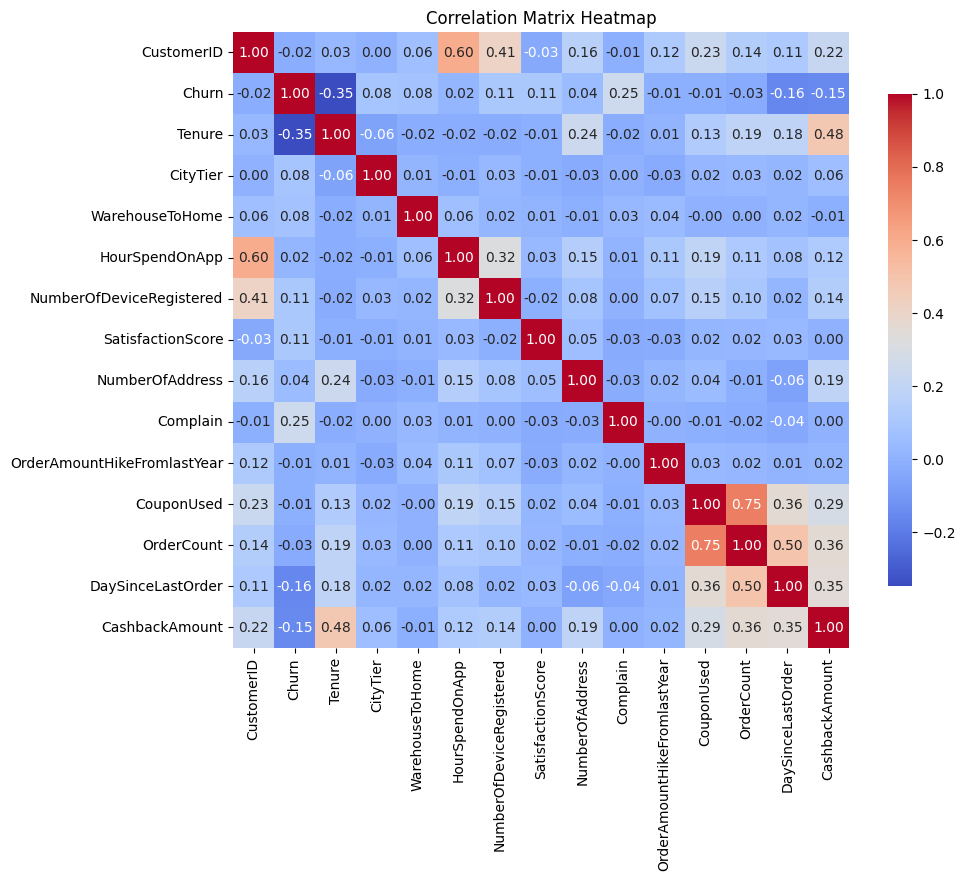

In [13]:
# Calculate the correlation matrix
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = df_cleaned[numeric_columns].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

By checking the corelation, there is lower corelation between tenure and other columns

In [14]:
# 1. Median imputation for the 'Tenure' column
median_imputer = SimpleImputer(strategy='median')
df_cleaned['Tenure'] = median_imputer.fit_transform(df_cleaned[['Tenure']])
df_cleaned['WarehouseToHome'] = median_imputer.fit_transform(df_cleaned[['WarehouseToHome']])
df_cleaned['OrderAmountHikeFromlastYear'] = median_imputer.fit_transform(df_cleaned[['OrderAmountHikeFromlastYear']])
df_cleaned['DaySinceLastOrder'] = median_imputer.fit_transform(df_cleaned[['DaySinceLastOrder']])
df_cleaned['HourSpendOnApp'] = median_imputer.fit_transform(df_cleaned[['HourSpendOnApp']])

imputer = IterativeImputer(max_iter=10, random_state=0)
df_cleaned[['CouponUsed', 'OrderCount']] = imputer.fit_transform(df_cleaned[['CouponUsed', 'OrderCount']])
df_cleaned['CouponUsed'] = df_cleaned['CouponUsed'].astype(int)
df_cleaned['OrderCount'] = df_cleaned['OrderCount'].astype(int)

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [16]:
df_cleaned.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


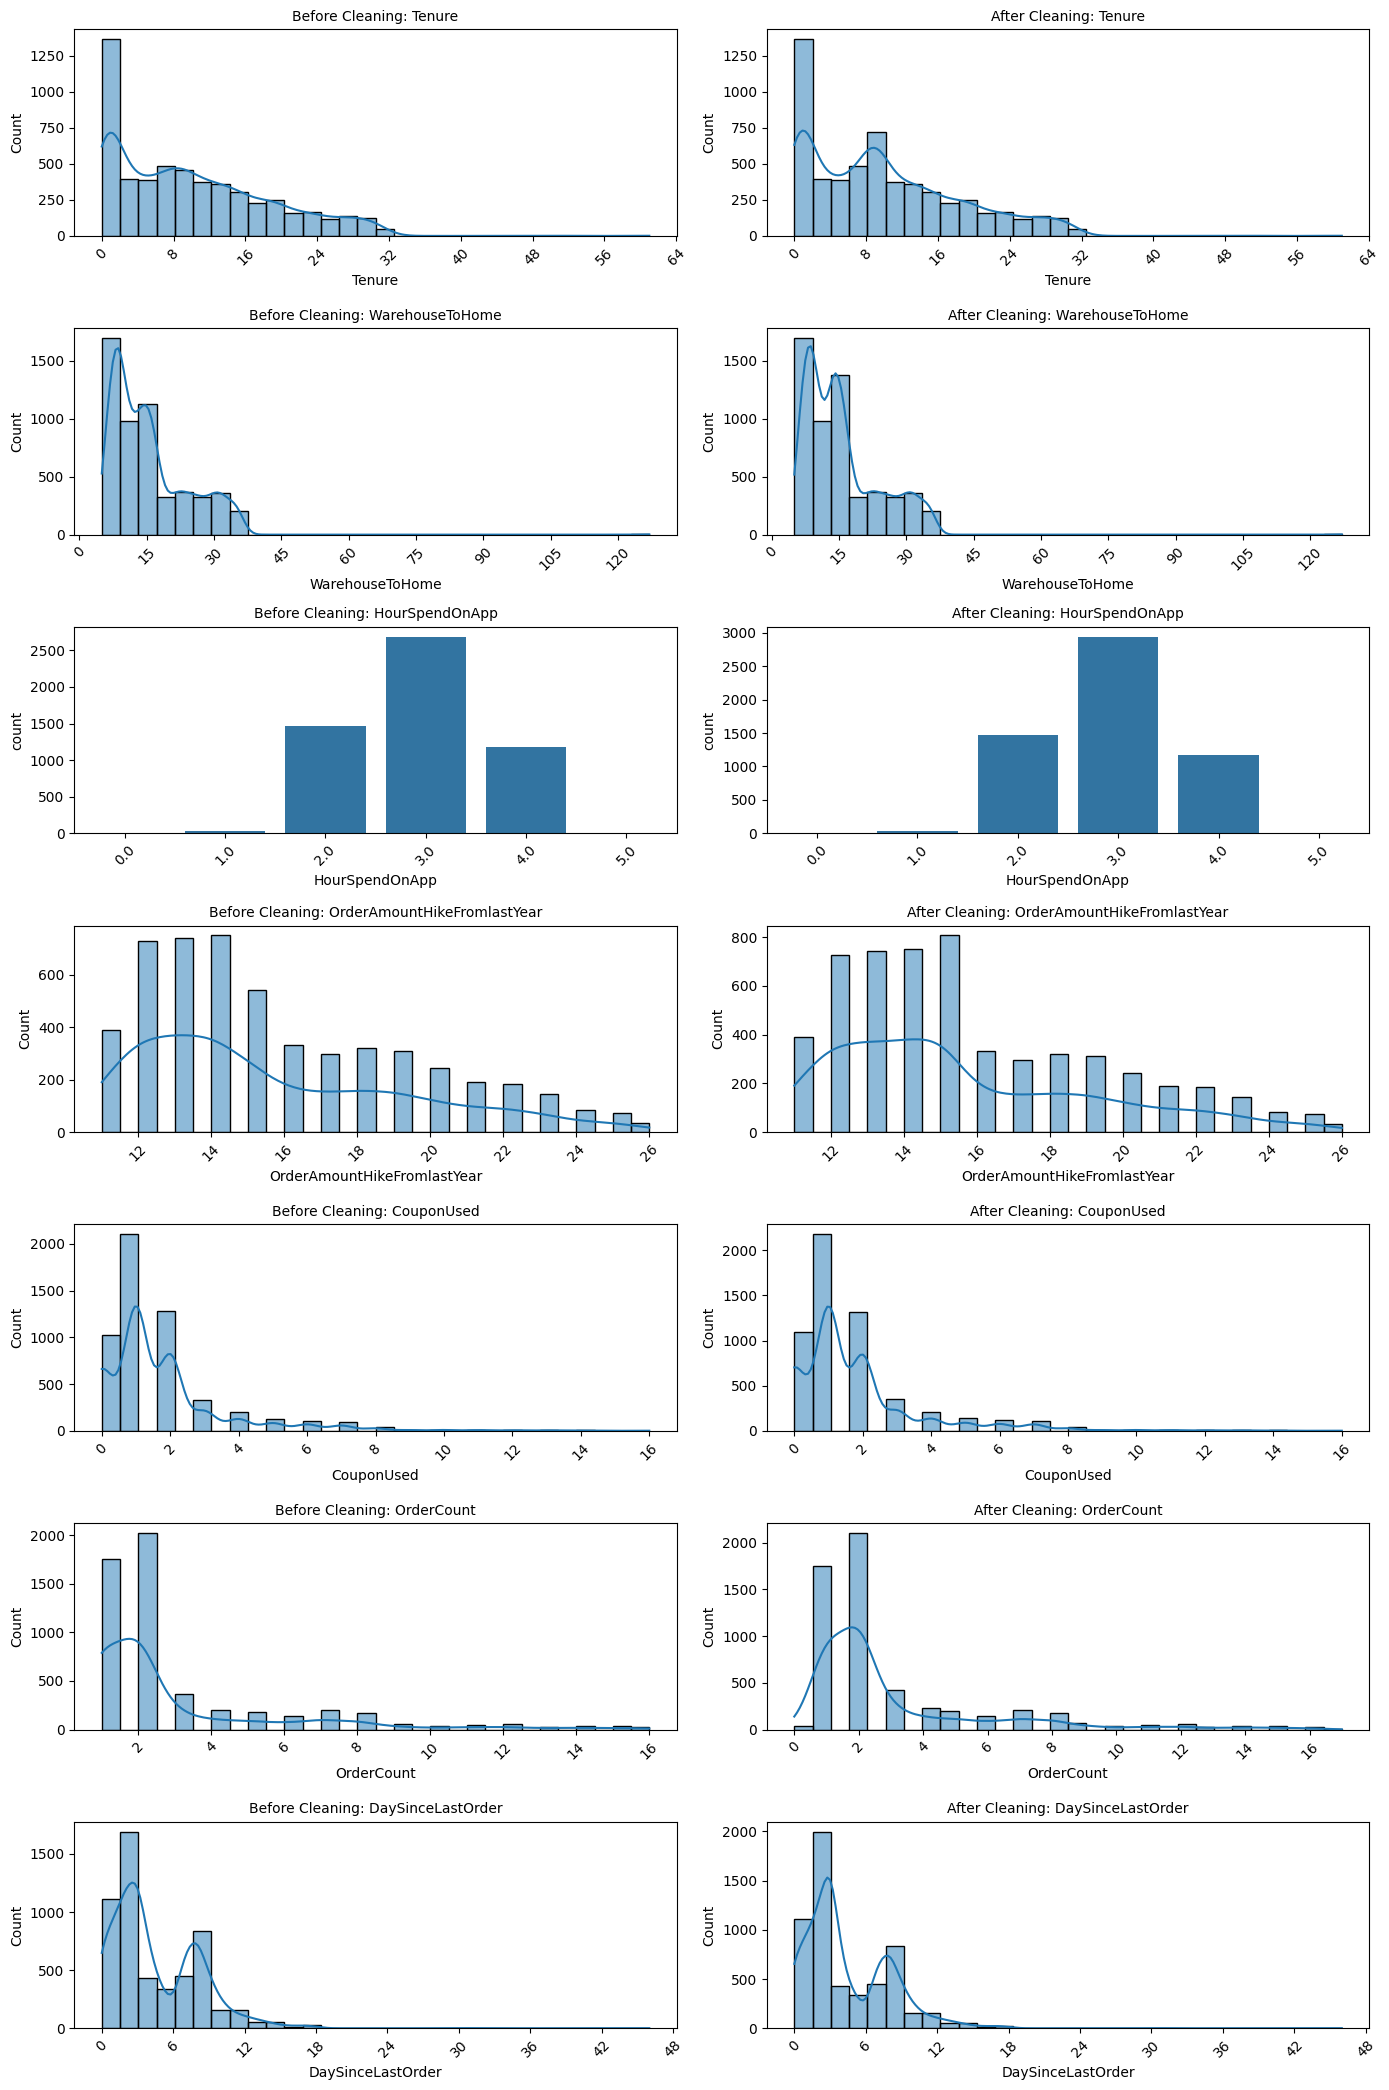

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Columns with null values
columns_with_null = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                     'OrderAmountHikeFromlastYear', 'CouponUsed',
                     'OrderCount', 'DaySinceLastOrder']

# Function to plot distributions for both original and cleaned data side by side
def plot_distributions_comparison(df_before, df_after, columns, title_prefix_before, title_prefix_after):
    n_cols = 2  # Number of columns in the grid layout
    n_rows = len(columns)  # One row per column comparison (original vs cleaned)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))  # Adjust figure size for two columns
    axes = axes.flatten()

    # Loop through each column and plot both before and after distributions side by side
    for i, col in enumerate(columns):
        # Plot for original (before cleaning)
        if df_before[col].dtype == 'object' or len(df_before[col].unique()) <= 10:
            sns.countplot(x=col, data=df_before, ax=axes[2 * i])
        else:
            sns.histplot(df_before[col], bins=30, kde=True, ax=axes[2 * i])

        # Set the title and format the x-axis ticks to be integers
        axes[2 * i].set_title(f'{title_prefix_before} {col}', fontsize=10)
        axes[2 * i].tick_params(axis='x', rotation=45)
        axes[2 * i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure x-axis has integer ticks

        # Plot for cleaned (after cleaning)
        if df_after[col].dtype == 'object' or len(df_after[col].unique()) <= 10:
            sns.countplot(x=col, data=df_after, ax=axes[2 * i + 1])
        else:
            sns.histplot(df_after[col], bins=30, kde=True, ax=axes[2 * i + 1])

        # Set the title and format the x-axis ticks to be integers
        axes[2 * i + 1].set_title(f'{title_prefix_after} {col}', fontsize=10)
        axes[2 * i + 1].tick_params(axis='x', rotation=45)
        axes[2 * i + 1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure x-axis has integer ticks

    plt.tight_layout()
    plt.show()

# Plot distributions comparison between before cleaning (df) and after cleaning (df_cleaned)
plot_distributions_comparison(df, df_cleaned, columns_with_null,
                              title_prefix_before="Before Cleaning:",
                              title_prefix_after="After Cleaning:")


### Plot1(Sachin)

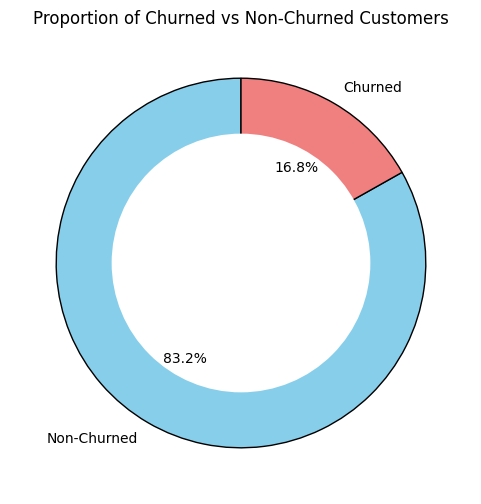

In [18]:
#1. Donut chart for proportion of churn rate
plt.figure(figsize=(6,6))
churn_counts = df_cleaned['Churn'].value_counts()
colors = ['skyblue', 'lightcoral']
plt.pie(churn_counts, labels=['Non-Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proportion of Churned vs Non-Churned Customers')
plt.show()

### Plot 1 Insight : We begin by looking at the overall churn rate by using a donut chart.The chart reveals us that a notable percentage of customers have churned, while majority of the customers have remained loyal.Specifically, 16.8% of the customers got churned, while 83.2% have stayed.

### Plot 2(Sachin):

<ipython-input-19-bb0b6465dcf2>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_tenure = df_cleaned.groupby('TenureGroup')['Churn'].mean() * 100


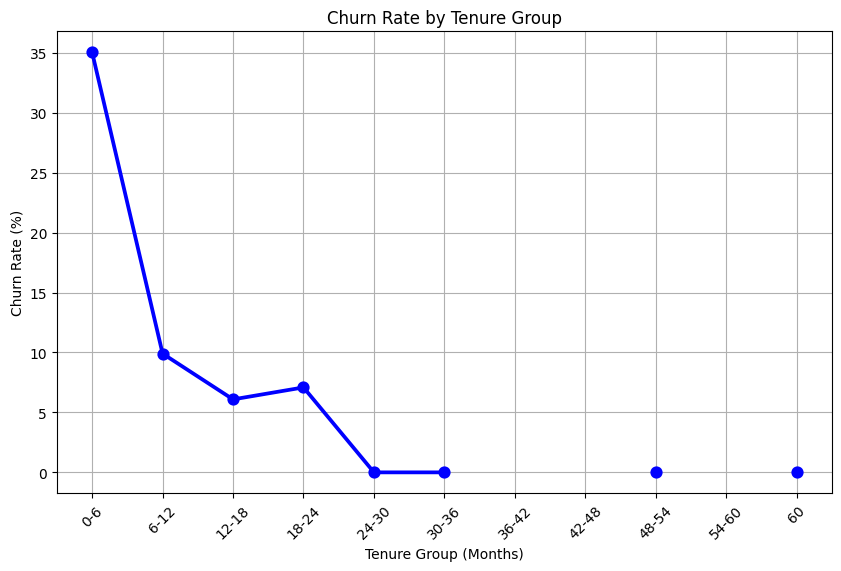

In [19]:
# Plot 2 : Churn Rate by Tenure
bins = [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, df_cleaned['Tenure'].max()]
labels = ['0-6', '6-12', '12-18', '18-24', '24-30', '30-36', '36-42', '42-48', '48-54', '54-60', '60']
df_cleaned['TenureGroup'] = pd.cut(df_cleaned['Tenure'], bins=bins, labels=labels, right=False)


churn_rate_by_tenure = df_cleaned.groupby('TenureGroup')['Churn'].mean() * 100


plt.figure(figsize=(10, 6))
sns.pointplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values, color='b', marker='o')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Plot 2 Insight : Now, we analyze the connection between customer tenure and churn. This line graph shows that customers who have been with the company for a shorter duration, particularly less than 12 months, are more likely to churn compared to long-term customers. This indicates that newer customers tend to leave more frequently, highlighting the need for the company to prioritize onboarding, early engagement, and loyalty initiatives to reduce churn in the initial months.

In [25]:
df_cleaned.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureGroup
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1,1,5.0,160,0-6
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0,1,0.0,121,6-12
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0,1,3.0,120,6-12
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0,1,3.0,134,0-6
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,...,5,Single,3,0,11.0,1,1,3.0,130,0-6


Karthik Chart for Complain vs Satisfactory Score for people who churned

<ipython-input-38-b316e7b639f4>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_churned.groupby(['Complain', 'TenureGroup', 'SatisfactionScore']).size().reset_index(name='Count')


<Figure size 1000x600 with 0 Axes>

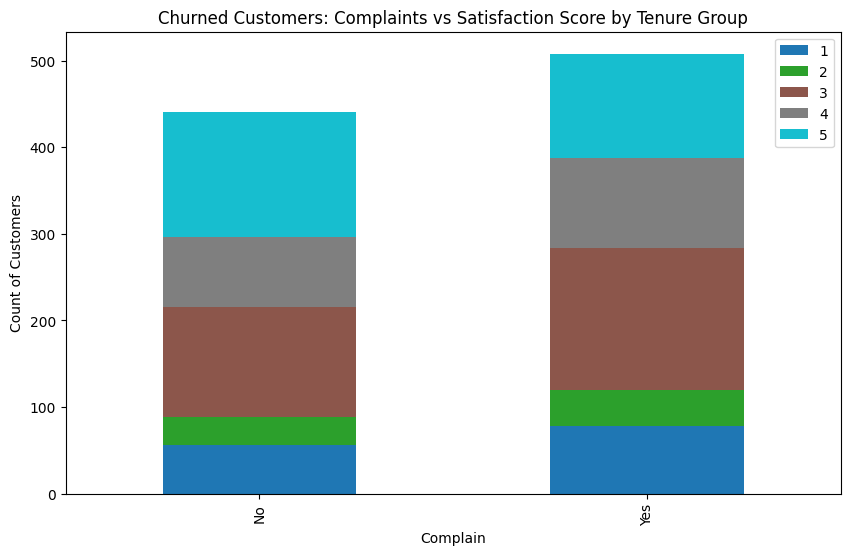

In [38]:
df_churned = df_cleaned[df_cleaned['Churn'] == 1]

# Grouping the data by 'Complain', 'TenureGroup', and 'SatisfactionScore'
grouped_data = df_churned.groupby(['Complain', 'TenureGroup', 'SatisfactionScore']).size().reset_index(name='Count')

# Pivoting the data to create a matrix suitable for stacked bar plotting
pivot_data = grouped_data.pivot_table(index=['Complain'], columns='SatisfactionScore', values='Count', aggfunc='sum', fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10,6))


# Adding title and labels
plt.title('Churned Customers: Complaints vs Satisfaction Score by Tenure Group')
plt.ylabel('Count of Customers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Complain')
plt.legend(loc='upper right')
# Display the plot
plt.show()

Karthik Chart for Complain vs Satisfactory Score for people who have not yet churned

<ipython-input-35-1a16bef6cada>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_churned.groupby(['Complain', 'TenureGroup', 'SatisfactionScore']).size().reset_index(name='Count')


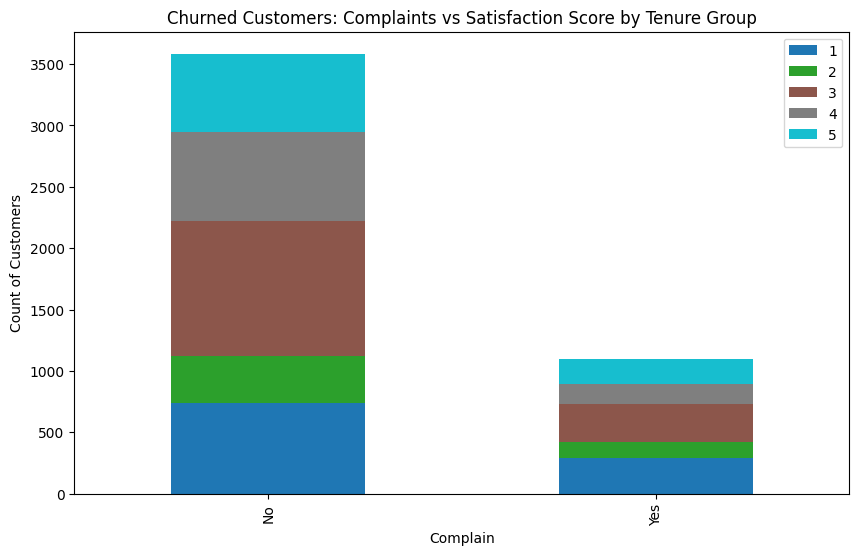

In [35]:
df_churned = df_cleaned[df_cleaned['Churn'] == 0]

# Grouping the data by 'Complain', 'TenureGroup', and 'SatisfactionScore'
grouped_data = df_churned.groupby(['Complain', 'TenureGroup', 'SatisfactionScore']).size().reset_index(name='Count')

# Pivoting the data to create a matrix suitable for stacked bar plotting
pivot_data = grouped_data.pivot_table(index=['Complain'], columns='SatisfactionScore', values='Count', aggfunc='sum', fill_value=0)

# Plotting the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10,6))

# Adding title and labels
plt.title('Churned Customers: Complaints vs Satisfaction Score by Tenure Group')
plt.ylabel('Count of Customers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Complain')
plt.legend(loc='upper right')
# Display the plot
plt.show()

### Plot 3(Sachin):

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


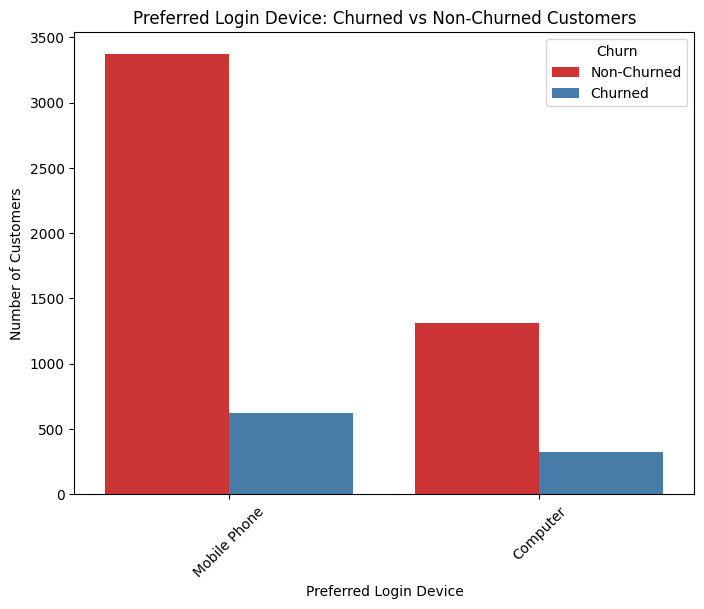

In [20]:
#3. Plot describing comaprison between Preferred Login Device
plt.figure(figsize=(8,6))
sns.countplot(data=df_cleaned, x='PreferredLoginDevice', hue='Churn', palette='Set1')
plt.title('Preferred Login Device: Churned vs Non-Churned Customers')
plt.xlabel('Preferred Login Device')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Non-Churned', 'Churned'])
plt.show()

### Plot 3 Insight : The count plot analyzing preferred login devices reveals important patterns in customer behavior. It shows that customers who primarily use mobile devices are more likely to churn compared to those who opt for desktops. This trend suggests that mobile users may be encountering difficulties, possibly due to a user experience or technical problems, which could be driving them away. To mitigate churn in this group, the company should consider addressing any usability issues that mobile users may face.

### Plot 4(Sachin):

<ipython-input-21-43289e823b20>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn Rate (%)', y='Complaint Status', data=complaint_data, palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


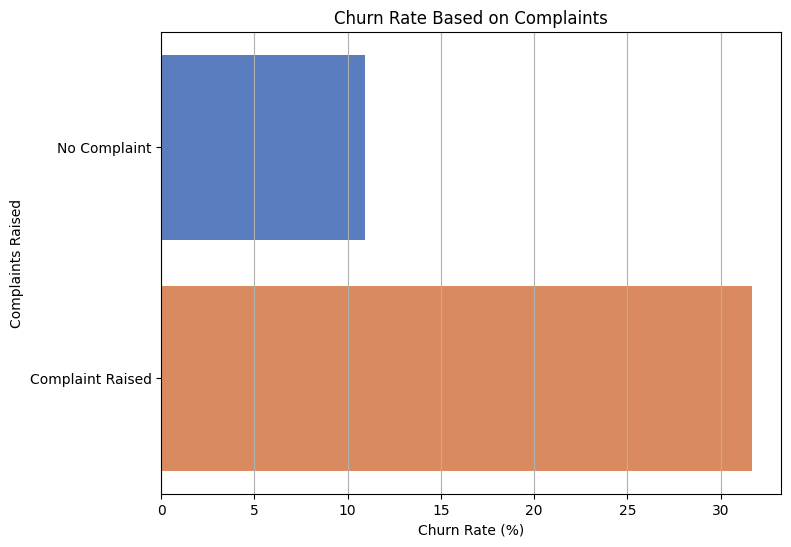

In [21]:
#Churn rate based on Complaints
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


complaint_churn_rate = df_cleaned.groupby('Complain')['Churn'].mean() * 100

complaint_data = pd.DataFrame({
    'Complaint Status': ['No Complaint', 'Complaint Raised'],
    'Churn Rate (%)': complaint_churn_rate.values
})


plt.figure(figsize=(8, 6))
sns.barplot(x='Churn Rate (%)', y='Complaint Status', data=complaint_data, palette='muted')
plt.title('Churn Rate Based on Complaints')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Complaints Raised')
plt.grid(axis='x')
plt.show()


### Plot 4 Insight : The bar plot illustrates the churn rates among customers who have filed complaints. It is evident that those who have raised issues are significantly more likely to churn than those who haven't reported any problems. This indicates that unresolved concerns may be a key factor in driving customers away. To reduce churn, the company should focus on improving its customer service and ensuring that complaints are addressed promptly.

### Plot 5(Sachin):

<ipython-input-22-6a742fc9bd6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cashback_mean.index, y=cashback_mean.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


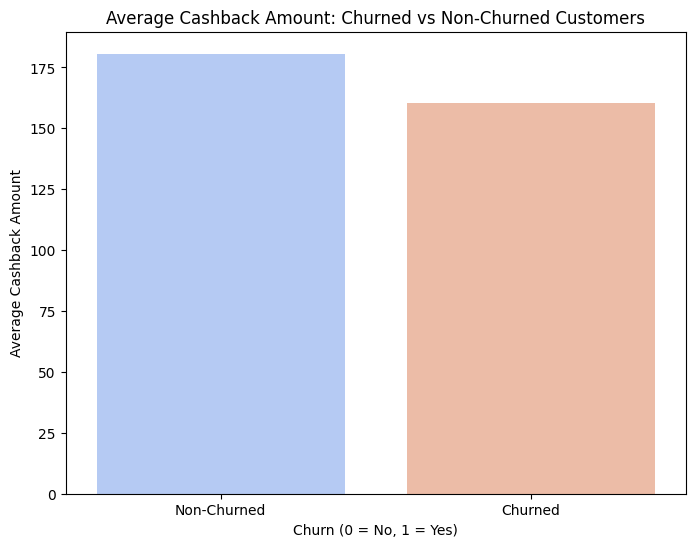

In [22]:
#5.Cashback Amount vs Churn
plt.figure(figsize=(8,6))
cashback_mean = df_cleaned.groupby('Churn')['CashbackAmount'].mean()
sns.barplot(x=cashback_mean.index, y=cashback_mean.values, palette='coolwarm')
plt.title('Average Cashback Amount: Churned vs Non-Churned Customers')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Cashback Amount')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

### Plot 5 Insight : Lastly, we analyze the connection between cashback incentives and churn behavior through a bar plot. The results reveal that customers who remain loyal tend to receive a higher average cashback amount than those who have churned. This suggests that cashback incentives could effectively help retain customers. By providing attractive cashback offers, particularly to those who are likely to churn, the company could enhance customer loyalty.

# Below is just template

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

if 'TenureGroup' in churn.columns:
    churn = churn.drop('TenureGroup', axis=1)

# Separate features and target variable
X = churn.drop('Churn', axis=1)  # Features (drop the target variable)
y = churn['Churn']  # Target variable

# Perform One-Hot Encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


NameError: name 'churn' is not defined

### Decision Tree Model

In [ ]:
Decision_Tree_Model = DecisionTreeClassifier(random_state=42)
Decision_Tree_Model.fit(X_train, y_train)

In [ ]:
y_pred = Decision_Tree_Model.predict(X_test)

### Evaluating the Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

### Logistic Regression Model

In [ ]:
LogisticRegression_Model = LogisticRegression(random_state=42)
LogisticRegression_Model.fit(X_train, y_train)

In [ ]:
y_pred_lr = LogisticRegression_Model.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {lr_accuracy}")